In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [2]:
df=pd.read_csv('data.csv')

In [3]:
print("shape ",df.shape)

shape  (569, 32)


In [4]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
df.describe(include="all")

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,3.037183e+07,NaN,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,NaN,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,NaN,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,NaN,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,NaN,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,NaN,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [7]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

No null values here!!


In [8]:
df.rename({'diagnosis':'target'}, axis=1,inplace=True)

In [9]:
df.head()

,id,target,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [10]:
df['target'].value_counts()

B    357
M    212
Name: target, dtype: int64

#### 357 benign, 212 malignant

In [11]:
df['target']=[1 if i == "M" else 0 for i in df['target']]
##replacing malignant with 1 and benign with 0

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

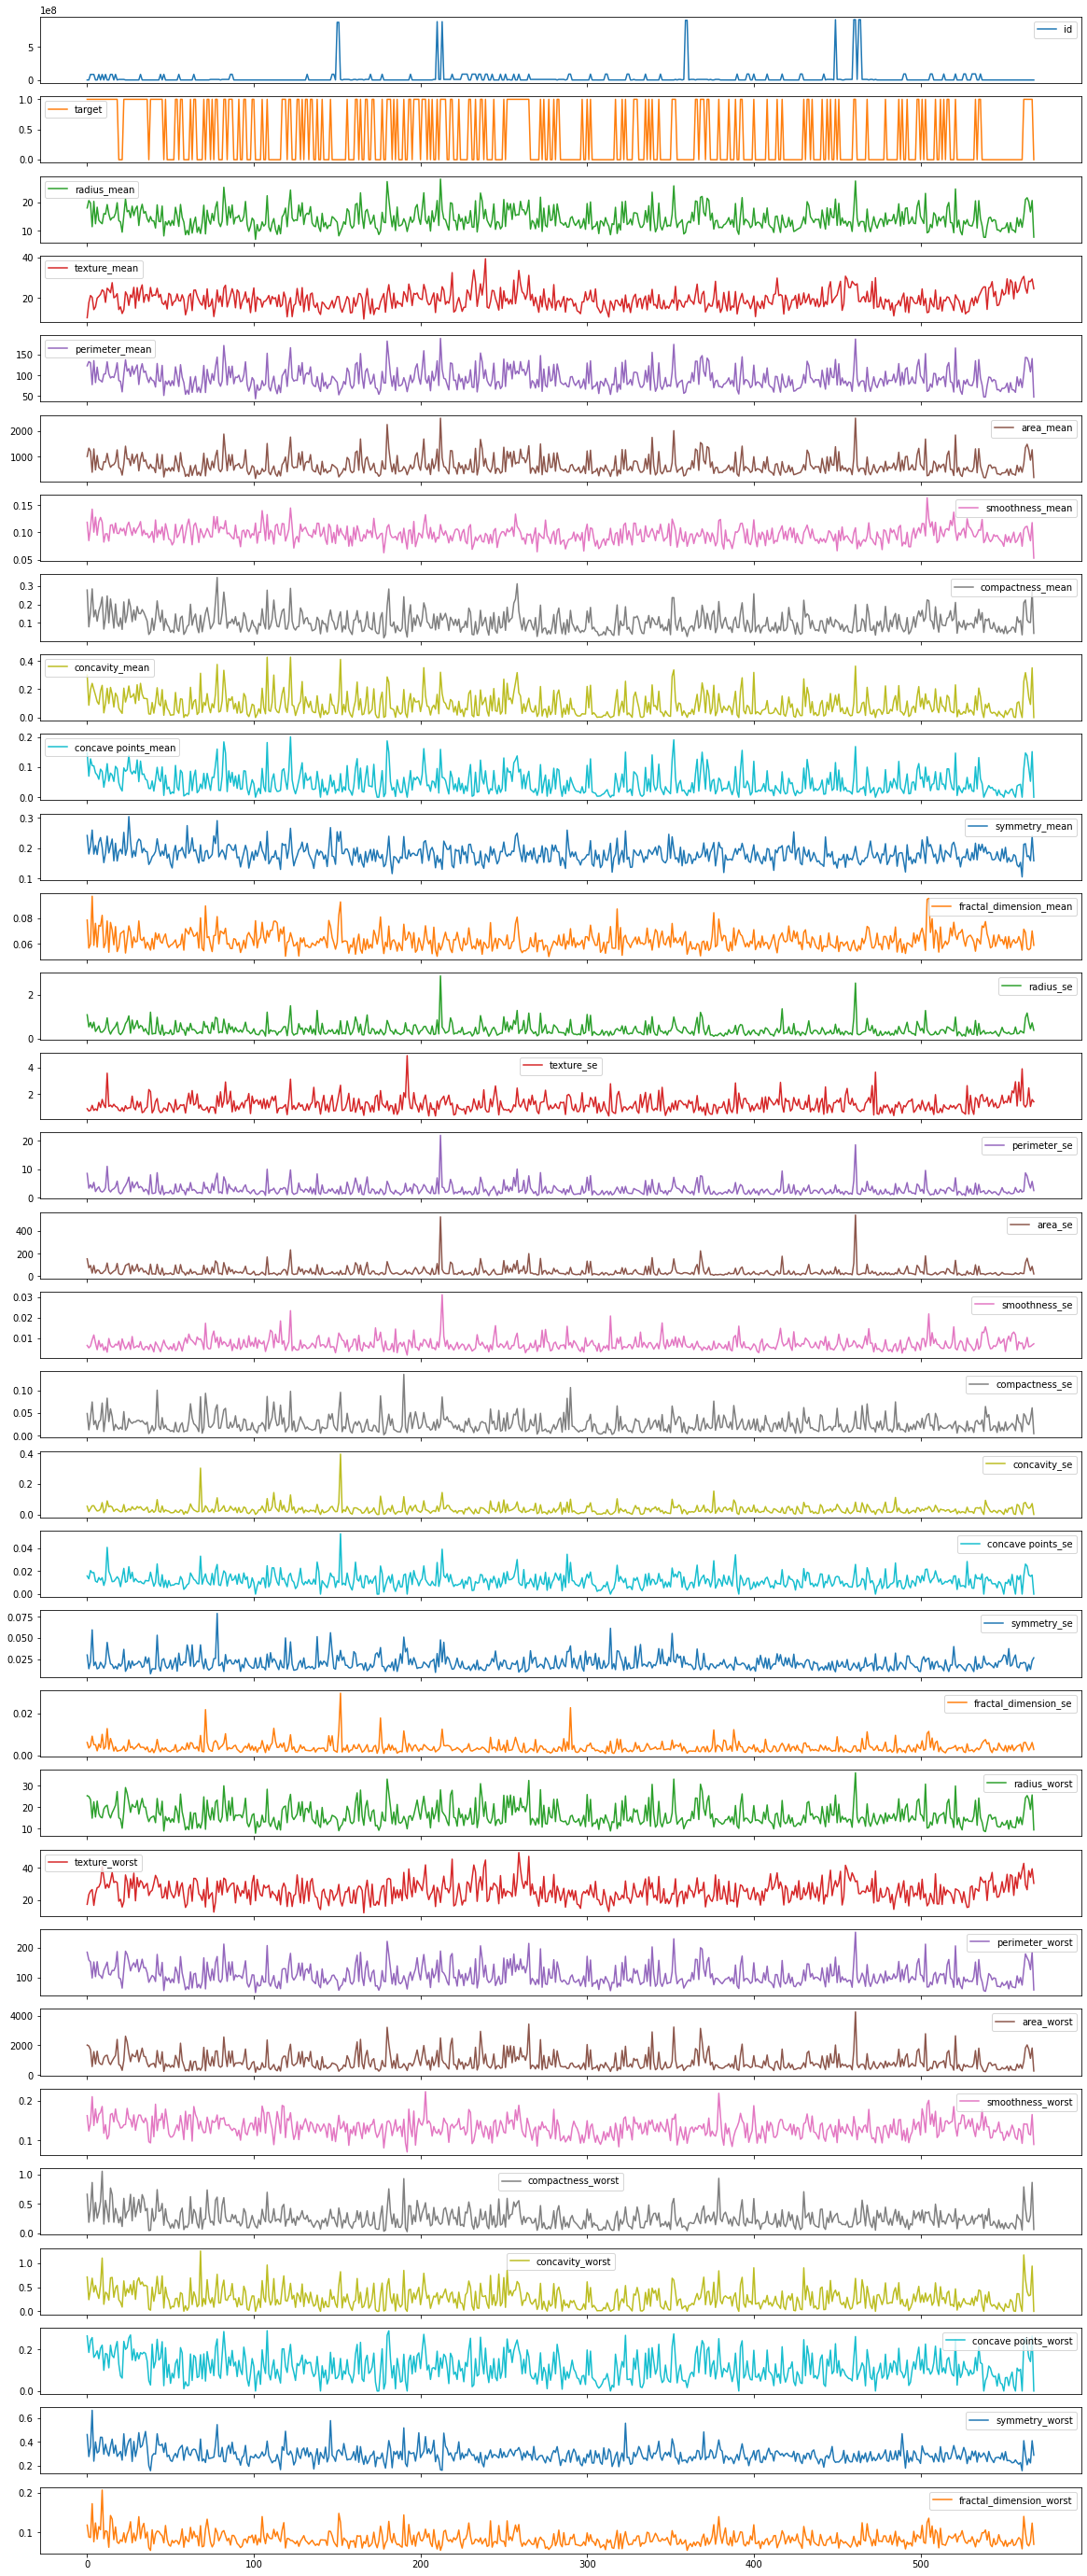

In [12]:
df.plot(subplots=True, sharex=True ,figsize=(20,50))

## Observation 
Data is looking quite balanced and we can move on to visualization

## Data Visulaization

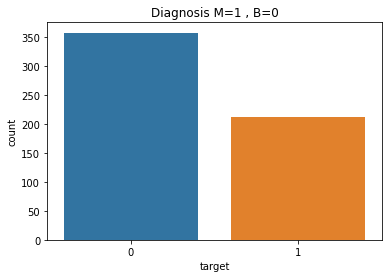

In [13]:
ax = sns.countplot(x="target", data=df)
plt.title("Diagnosis M=1 , B=0")
plt.show()

In [14]:
df.drop('id',axis=1,inplace=True)
corr=df.corr()

<AxesSubplot:>

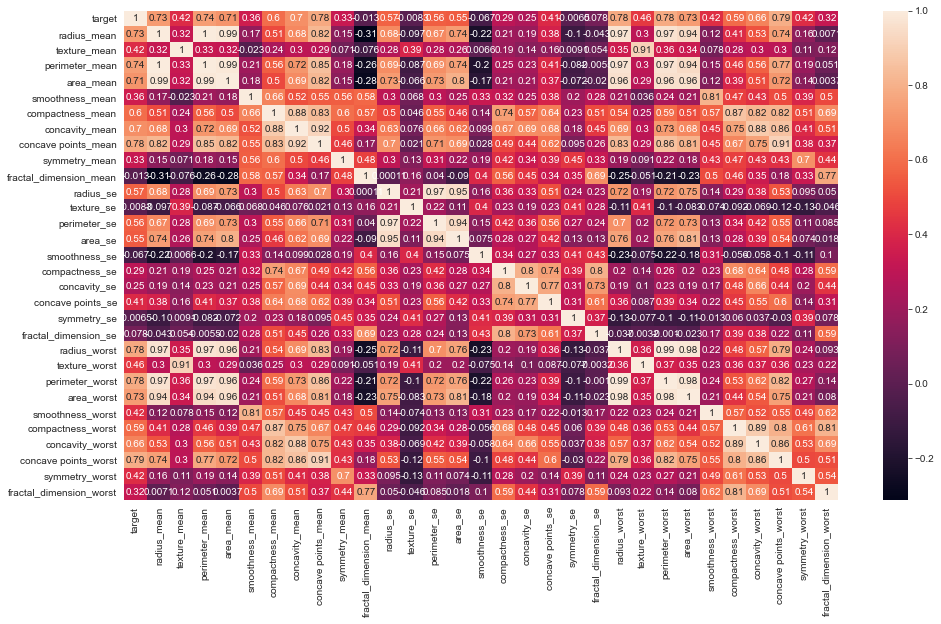

In [15]:
import matplotlib.style as style
style.use("ggplot")
sns.set_style('whitegrid')
plt.subplots(figsize = (16,9))

sns.heatmap(corr,annot=True)

In [16]:
df.corr()['target'].sort_values(ascending=False)

target                     1.000000
concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
symmetry_se               -0

<AxesSubplot:>

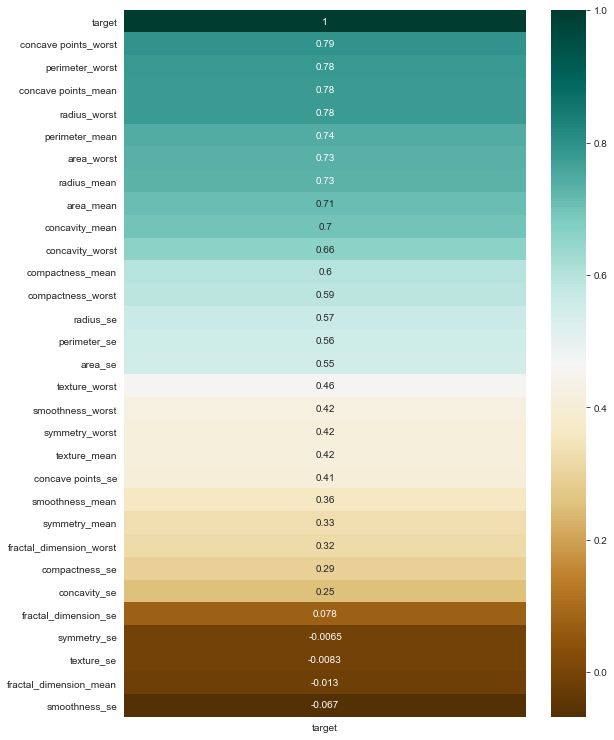

In [17]:
plt.subplots(figsize = (9,13))
sns.heatmap(df.corr()[['target']].sort_values(by='target', ascending=False), annot=True, cmap='BrBG')

concave points_worst, perimeter_worst, concave points_mean, radius_worst, perimeter_mean
They resemble high correlation with target

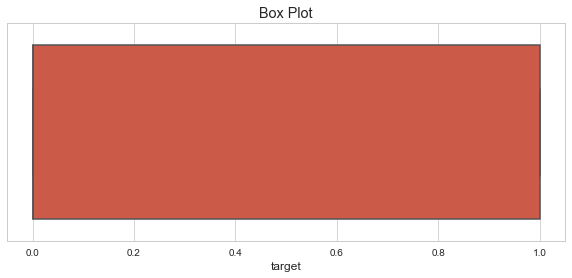

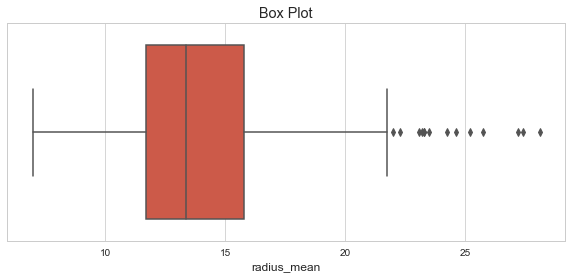

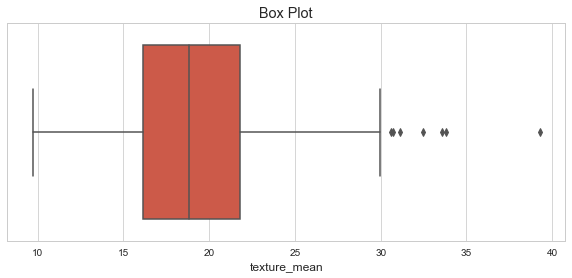

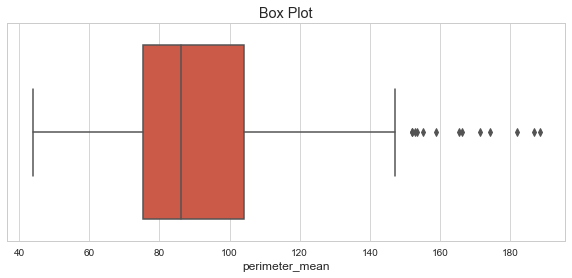

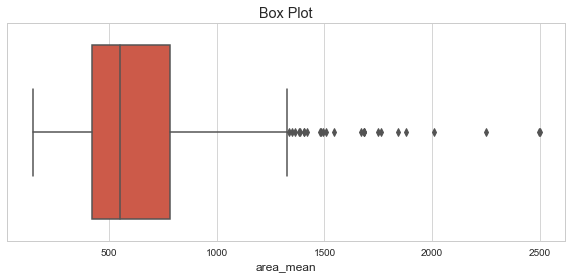

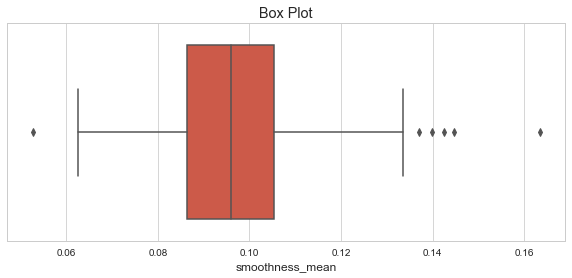

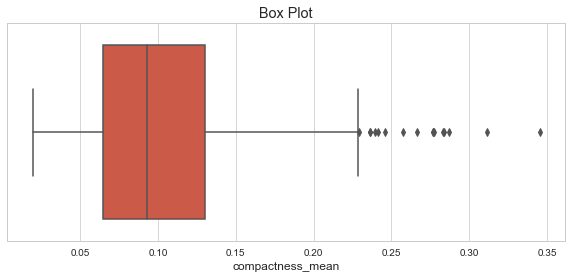

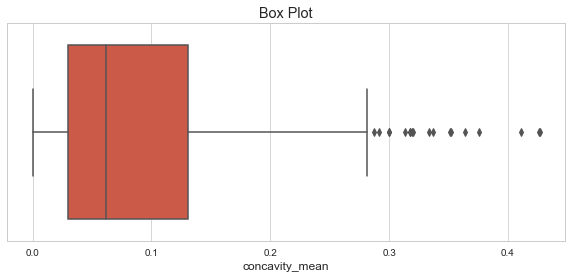

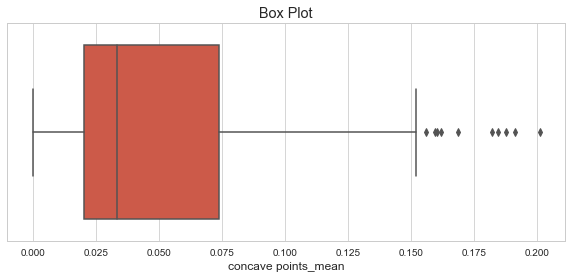

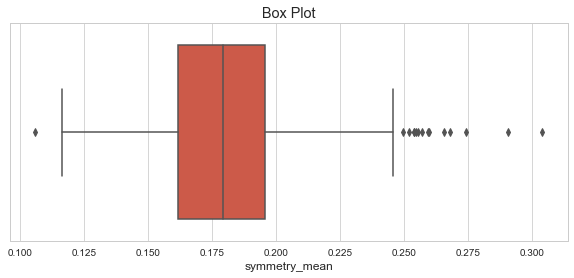

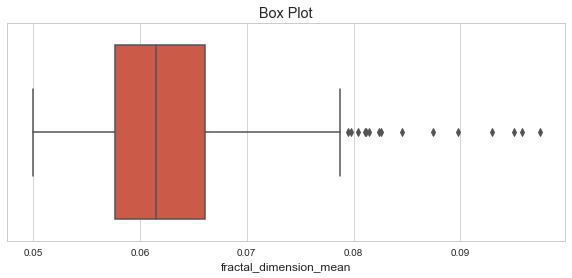

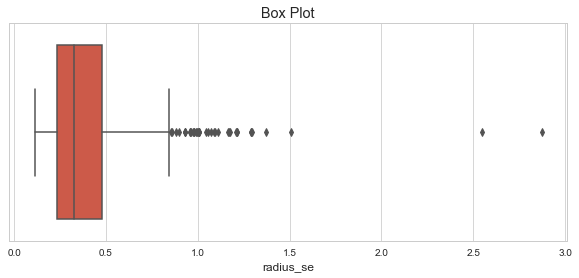

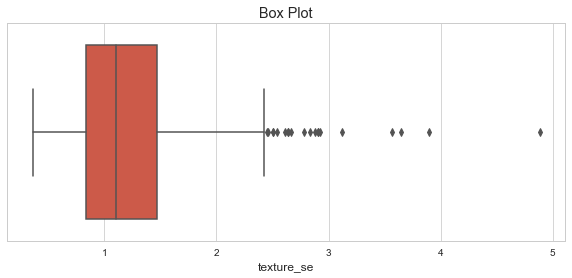

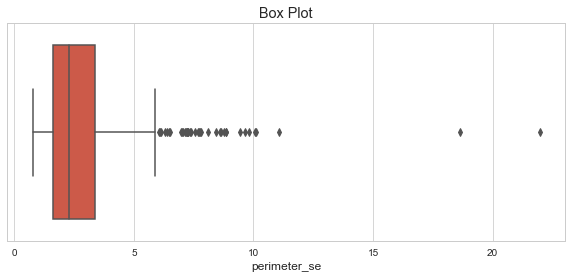

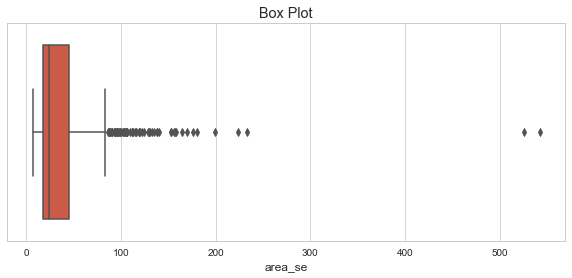

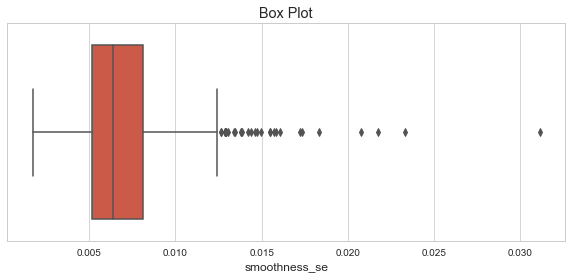

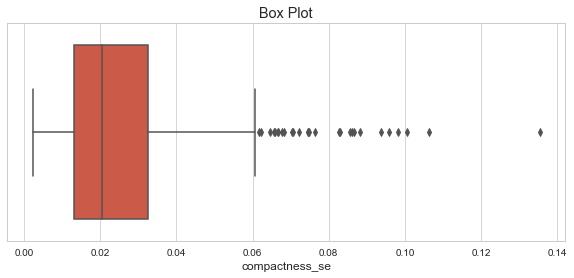

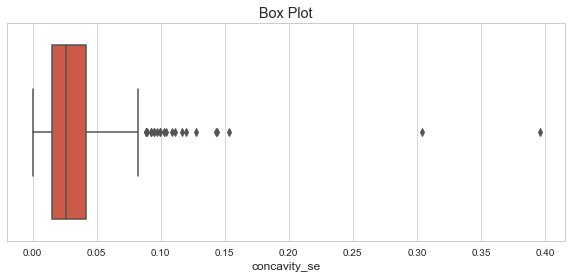

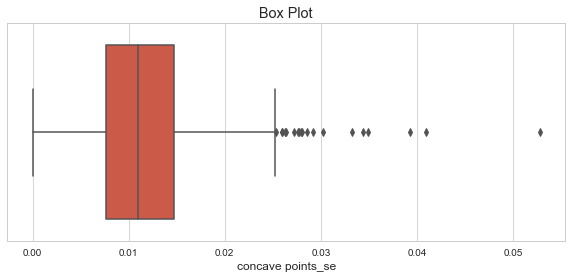

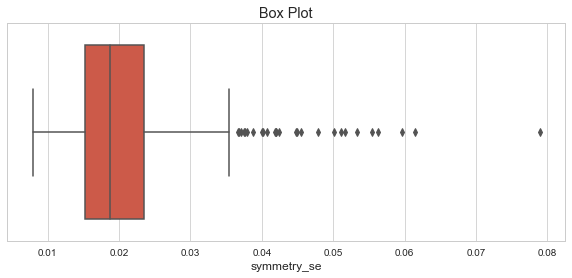

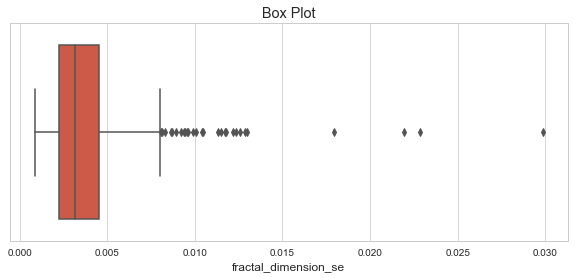

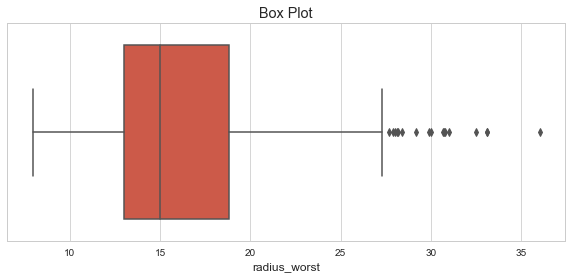

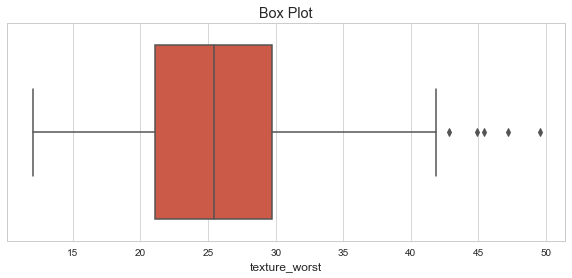

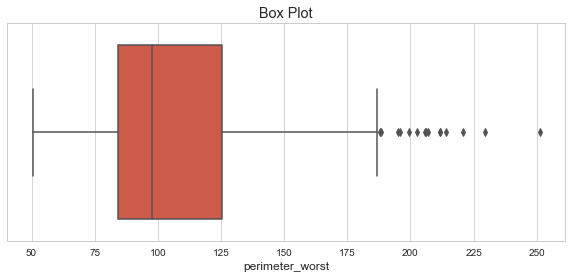

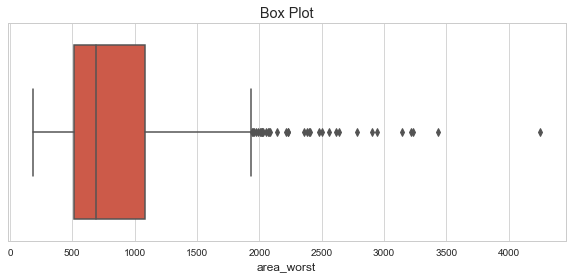

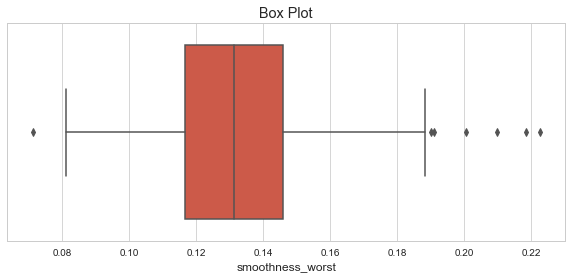

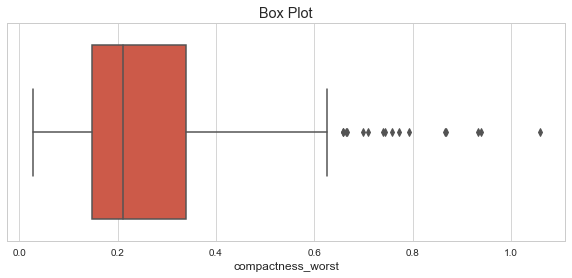

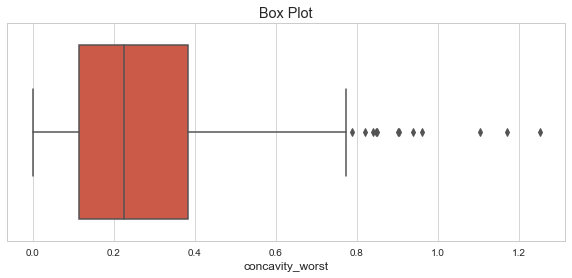

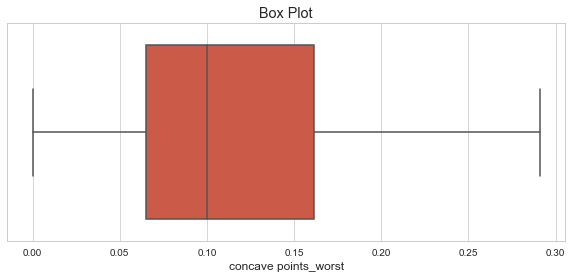

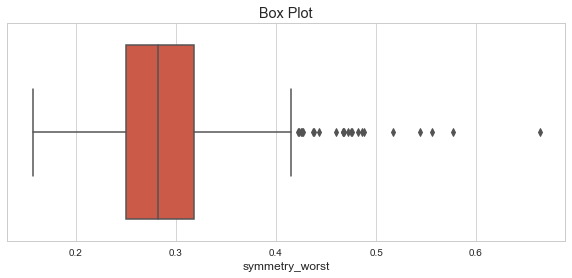

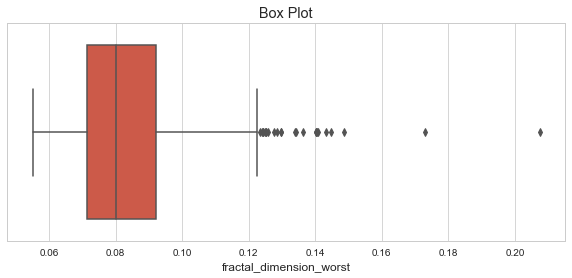

In [18]:
def Box_plots(df):
    plt.figure(figsize=(10, 4))
    plt.title("Box Plot")
    sns.boxplot(df)
    plt.show()
for i in df.columns:
    Box_plots(df[i])

We can see there are some outliers in our data we will have to remove this for better result

In [19]:
X = df.drop(["target"], axis = 1)
y = df.target

In [20]:
col = X.columns.tolist()

In [21]:
df.shape

(569, 31)

## Outliers 

In [22]:
from sklearn.neighbors import LocalOutlierFactor

In [23]:
clf = LocalOutlierFactor()
y_pred = clf.fit_predict(X)

In [24]:
X_score = clf.negative_outlier_factor_
outlier_score = pd.DataFrame()
outlier_score["score"] = X_score
threshold = -2.0
filtre = outlier_score["score"] < threshold
outlier_index = outlier_score[filtre].index.tolist()

In [25]:
X = X.drop(outlier_index)
y = y.drop(outlier_index).values

In [26]:
X.shape

(564, 30)

## Modeling

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y,test_size = 0.3,random_state = 42)

In [28]:
allAlgo = [('lr', LogisticRegression()),('knn', KNeighborsClassifier()),('dclf', DecisionTreeClassifier()),
          ('svm', SVC()),('nb', GaussianNB()),('rf',RandomForestClassifier()),]

In [29]:
res = []
algoName = []
for name, model in allAlgo:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring="accuracy")
    res.append(cv_results)
    algoName.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


lr: 0.946474 (0.026867)
knn: 0.931346 (0.030206)
dclf: 0.916090 (0.037931)
svm: 0.913654 (0.036514)
nb: 0.946603 (0.026393)
rf: 0.969359 (0.022384)


We can see logistic regression and random forest classifier shows good accuracy without scaling data


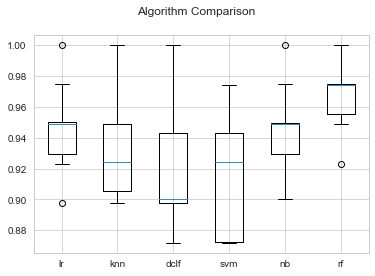

In [30]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(res)
ax.set_xticklabels(algoName)
plt.show()

In [31]:
pipelines = []

pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('lr',LogisticRegression())])))

pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('knn',KNeighborsClassifier())])))

pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('dclf',DecisionTreeClassifier())])))

pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('nb',GaussianNB())])))

pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('svm', SVC())])))

pipelines.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('rf', RandomForestClassifier())])))

res = []
algoName = []
for name, model in pipelines:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring="accuracy")
    res.append(cv_results)
    algoName.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: 0.987244 (0.017154)
ScaledKNN: 0.961667 (0.030930)
ScaledCART: 0.916154 (0.035899)
ScaledNB: 0.944038 (0.015650)
ScaledSVM: 0.979744 (0.015088)
ScaledRF: 0.966731 (0.025789)


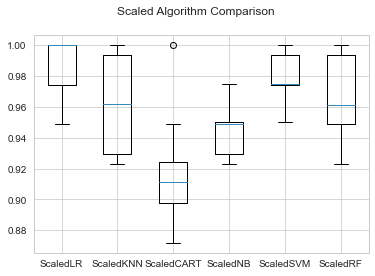

In [32]:
fig = plt.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(res)
ax.set_xticklabels(algoName)
plt.show()

We can see the difference after scaling data!! LR, SVM, Rf show quite good accuracy

## Tuning SVM

In [33]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C=c_values, kernel=kernel_values)
model = SVC()
kfold = KFold(n_splits=11)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring="accuracy", cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.982251 using {'C': 0.3, 'kernel': 'linear'}
0.979726 (0.020851) with: {'C': 0.1, 'kernel': 'linear'}
0.852453 (0.056924) with: {'C': 0.1, 'kernel': 'poly'}
0.941414 (0.033238) with: {'C': 0.1, 'kernel': 'rbf'}
0.956638 (0.032818) with: {'C': 0.1, 'kernel': 'sigmoid'}
0.982251 (0.017898) with: {'C': 0.3, 'kernel': 'linear'}
0.877850 (0.053114) with: {'C': 0.3, 'kernel': 'poly'}
0.961760 (0.027661) with: {'C': 0.3, 'kernel': 'rbf'}
0.972078 (0.026640) with: {'C': 0.3, 'kernel': 'sigmoid'}
0.979726 (0.017160) with: {'C': 0.5, 'kernel': 'linear'}
0.893146 (0.047939) with: {'C': 0.5, 'kernel': 'poly'}
0.969481 (0.018749) with: {'C': 0.5, 'kernel': 'rbf'}
0.967027 (0.028546) with: {'C': 0.5, 'kernel': 'sigmoid'}
0.977056 (0.020145) with: {'C': 0.7, 'kernel': 'linear'}
0.895671 (0.048378) with: {'C': 0.7, 'kernel': 'poly'}
0.972006 (0.016995) with: {'C': 0.7, 'kernel': 'rbf'}
0.966955 (0.026425) with: {'C': 0.7, 'kernel': 'sigmoid'}
0.977056 (0.020145) with: {'C': 0.9, 'kernel': 'line

## SVM

In [34]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = SVC(kernel='linear',C=0.3)
model.fit(rescaledX, Y_train)
# estimate accuracy on validation dataset
rescaledValidationX = scaler.transform(X_test)
predictions = model.predict(rescaledValidationX)
print(accuracy_score(Y_test, predictions))
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))

0.9588235294117647
[[105   2]
 [  5  58]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       107
           1       0.97      0.92      0.94        63

    accuracy                           0.96       170
   macro avg       0.96      0.95      0.96       170
weighted avg       0.96      0.96      0.96       170



## GaussianNB

In [35]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
nb_classifier = GaussianNB()
nb_classifier.fit(rescaledX, Y_train)
# estimate accuracy on validation dataset
rescaledValidationX = scaler.transform(X_test)
predictions = nb_classifier.predict(rescaledValidationX)
print(accuracy_score(Y_test, predictions))
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))

0.9294117647058824
[[104   3]
 [  9  54]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.95       107
           1       0.95      0.86      0.90        63

    accuracy                           0.93       170
   macro avg       0.93      0.91      0.92       170
weighted avg       0.93      0.93      0.93       170



## RandomForestClassifier

In [36]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
rf=RandomForestClassifier(random_state=101)
rf.fit(rescaledX, Y_train)
# estimate accuracy on validation dataset
rescaledValidationX = scaler.transform(X_test)
predictions = rf.predict(rescaledValidationX)
print(accuracy_score(Y_test, predictions))
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))

0.9588235294117647
[[106   1]
 [  6  57]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       107
           1       0.98      0.90      0.94        63

    accuracy                           0.96       170
   macro avg       0.96      0.95      0.96       170
weighted avg       0.96      0.96      0.96       170



## Logistic Regression

In [45]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
lr=LogisticRegression(solver='saga',penalty='l2',l1_ratio=0.6,random_state=41)
lr.fit(rescaledX, Y_train)
# estimate accuracy on validation dataset
rescaledValidationX = scaler.transform(X_test)
predictions = lr.predict(rescaledValidationX)
print(accuracy_score(Y_test, predictions))
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))

0.9647058823529412
[[106   1]
 [  5  58]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       107
           1       0.98      0.92      0.95        63

    accuracy                           0.96       170
   macro avg       0.97      0.96      0.96       170
weighted avg       0.97      0.96      0.96       170



## XGBoost

In [46]:
from xgboost import XGBClassifier
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
xgb_classifier = XGBClassifier()
xgb_classifier.fit(rescaledX, Y_train)
# estimate accuracy on validation dataset
rescaledValidationX = scaler.transform(X_test)
predictions = xgb_classifier.predict(rescaledValidationX)
print(accuracy_score(Y_test, predictions))
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))

[00:27:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.9588235294117647
[[106   1]
 [  6  57]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       107
           1       0.98      0.90      0.94        63

    accuracy                           0.96       170
   macro avg       0.96      0.95      0.96       170
weighted avg       0.96      0.96      0.96       170



### Cross-Validation

#### RandomforestClassifier

In [47]:
from sklearn.model_selection import cross_val_score
cross_validation = cross_val_score(estimator = rf, X = X_train, y =Y_train, cv =10)
print("Cross validation of SVC model = ",cross_validation)
print("Cross validation of SVC model (in mean) = ",cross_validation.mean())

Cross validation of SVC model =  [0.975      1.         1.         0.95       0.97435897 0.94871795
 0.97435897 0.94871795 0.92307692 0.97435897]
Cross validation of SVC model (in mean) =  0.9668589743589744


#### Logistic Regression

In [48]:
cross_validation = cross_val_score(estimator = lr, X = X_train, y =Y_train, cv =10)
print("Cross validation of SVC model = ",cross_validation)
print("Cross validation of SVC model (in mean) = ",cross_validation.mean())

Cross validation of SVC model =  [0.975      0.95       0.925      0.925      0.87179487 0.8974359
 0.92307692 0.8974359  0.87179487 0.8974359 ]
Cross validation of SVC model (in mean) =  0.9133974358974359
